# Band detection

Using Hough transform analysis [skimage.transform.hough_line_peaks](https://scikit-image.org/docs/dev/api/skimage.transform.html?highlight=hough#skimage.transform.hough_line_peaks)

In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import skimage.morphology
import xarray as xr

import xarray_image_processing.xarray_image_processing as ximP
import xarray_image_processing.plot_imP as pimP

In [2]:
data=pickle.load(open('Data/eqVM_Strain_DIC.xr','rb'))

In [3]:
ds_auto=data[5,:,:].imP.auto_correlation(pad=1)

(-0.2, 43.0, -0.2, 43.0)

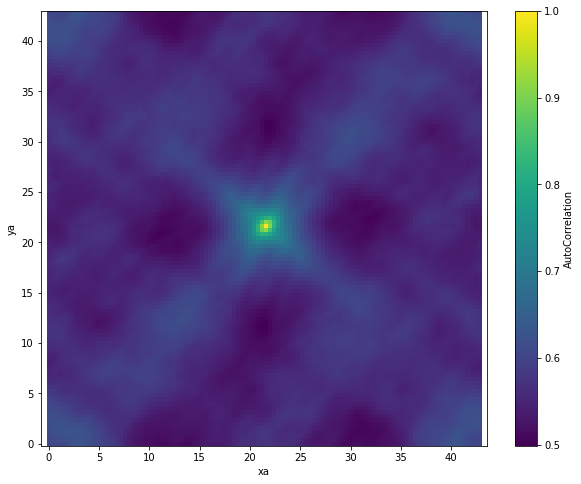

In [4]:
plt.figure(figsize=(10,8))
ds_auto.AutoCorrelation.plot()
plt.axis('equal')

In [5]:
bi_Autocor=ds_auto.AutoCorrelation>0.56

In [6]:
bi_Autocor_sk=xr.DataArray(skimage.morphology.skeletonize(np.array(bi_Autocor)))

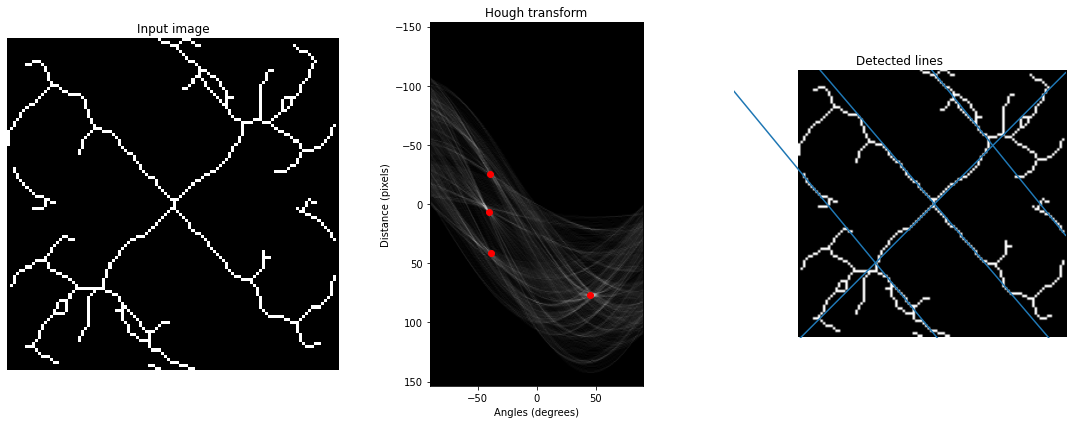

In [7]:
peaks=bi_Autocor_sk.imP.hough_transform(min_angle=25,min_distance=24)

In [8]:
peaks

(array([47, 44, 31, 30], dtype=uint64),
 array([ 0.78539816, -0.70685835, -0.68940505, -0.68067841]),
 array([ 76.75081967,   6.52131148, -25.58360656,  41.63606557]))